# 手書き文字の学習

このページでは、手書き文字の学習を行っています。

## 注意事項

- 「Googleへのログインが必要」と出たら、自分のGoogleアカウントでログインします。

- 「警告: このノートブックは Google が作成したものではありません。」と出たら「このまま実行」をクリックします。

- 学習には数分かかる場合があります。

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1090 - val_loss: 0.0405
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0373 - val_loss: 0.0290
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0276 - val_loss: 0.0229
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0223 - val_loss: 0.0193
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 - val_loss: 0.0167
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0165 - val_loss: 0.0147
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0147 - val_loss: 0.0133
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0133 - val_loss: 0.0123
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0124 - val_loss: 0.0116
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0118 - val_loss: 0.0111
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step


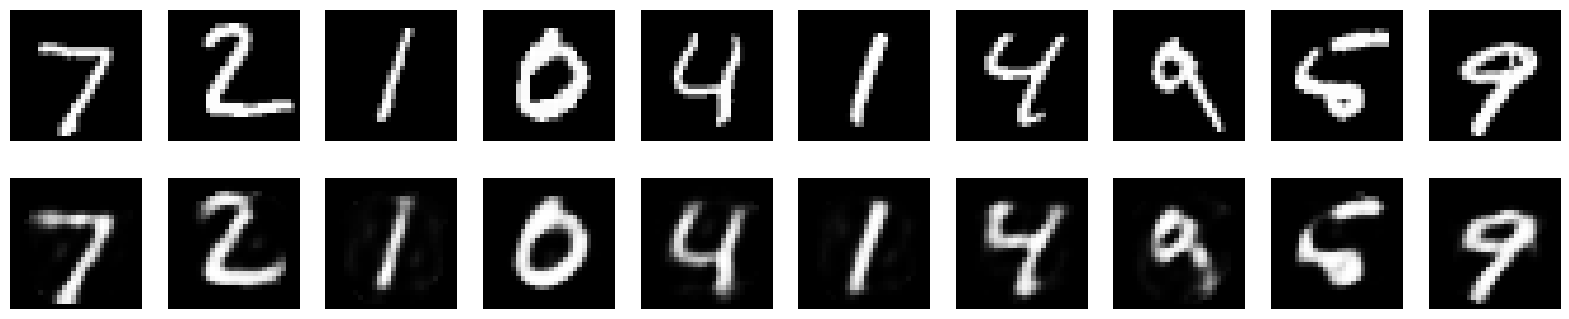

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# MNISTデータをロードして正規化
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 784)  # 28×28 を 784次元ベクトルに変換
x_test = x_test.reshape(-1, 784)

# Autoencoderの構築
input_layer = Input(shape=(784,))
encoded = Dense(32, activation="relu")(input_layer)  # 圧縮
decoded = Dense(784, activation="sigmoid")(encoded)  # 復元
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# 学習
autoencoder.fit(
    x_train, x_train, epochs=10, batch_size=256, validation_data=(x_test, x_test)
)

# 画像の再構成
decoded_imgs = autoencoder.predict(x_test)

# 結果の可視化
n = 10  # 表示する画像数
plt.figure(figsize=(20, 4))
for i in range(n):
    # オリジナル画像
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # 再構成画像
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

plt.show()